In [22]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Instantiate grid search tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:18: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:126: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  def __init__(self):
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


# Tuning: nominated network

## 1. Grid search: crude (400 parameter combinations)

In [24]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)

### 1.1. Run grid search simulations

In [25]:
result_error, result_child, result_cl, empirical_data = tuning.execute(t_range=seq,
                                                                       i_range=seq,
                                                                       t=700,
                                                                       population_name='nomination')

thres_PA: 0.0 I_PA: 0.0 error: 0.6122728301067148 runtime: 8.874284982681274
thres_PA: 0.0 I_PA: 0.05 error: 16.023594711776983 runtime: 8.943035125732422
thres_PA: 0.0 I_PA: 0.1 error: 36.24829393808986 runtime: 8.851192235946655
thres_PA: 0.0 I_PA: 0.15000000000000002 error: 38.399625911176656 runtime: 8.983053922653198
thres_PA: 0.0 I_PA: 0.2 error: 38.9276894572583 runtime: 9.16125202178955
thres_PA: 0.0 I_PA: 0.25 error: 39.0806129305134 runtime: 8.72151494026184
thres_PA: 0.0 I_PA: 0.30000000000000004 error: 39.205016029787636 runtime: 8.708121061325073
thres_PA: 0.0 I_PA: 0.35000000000000003 error: 39.50391226239282 runtime: 8.703977108001709
thres_PA: 0.0 I_PA: 0.4 error: 39.652601400208795 runtime: 8.692981958389282
thres_PA: 0.0 I_PA: 0.45 error: 39.77437634622922 runtime: 8.602890014648438
thres_PA: 0.0 I_PA: 0.5 error: 39.458499813473054 runtime: 8.929728031158447
thres_PA: 0.0 I_PA: 0.55 error: 39.381633517328375 runtime: 8.875638008117676
thres_PA: 0.0 I_PA: 0.60000000000

### 1.2 Results

In [26]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,,,,,,,,,,,,,,,,,,,,,
0.00,0.612273,16.023595,36.248294,38.399626,38.927689,3.908061e+01,3.920502e+01,3.950391e+01,3.965260e+01,3.977438e+01,...,3.938163e+01,3.937841e+01,40.593702,40.811872,40.849912,40.961095,41.105591,41.195688,41.532317,42.155550
0.05,0.612273,846.346121,161.837592,50.114978,23.812004,1.413076e+01,2.310930e+30,2.243858e+29,9.192870e+31,4.840000e+08,...,1.516083e+14,5.202794e+03,15.700496,17.596286,19.856710,21.718739,24.093186,25.383966,31.292218,42.155550
0.10,0.612273,1.715520,1008.318890,405.440694,255.404369,1.374882e+24,1.089107e+02,1.184928e+34,5.988013e+25,9.624496e+15,...,1.339067e+15,1.116744e+05,4.664160,5.908340,6.224278,9.872092,10.058955,15.368347,23.664057,42.155550
0.15,0.612273,1.379107,1588.477648,1031.409119,681.477188,5.527709e+27,2.921413e+02,5.832485e+18,2.325851e+13,3.006675e+25,...,1.331142e+15,2.132595e+05,3.832338,4.243369,3.249523,4.056282,4.391562,8.072444,15.957421,41.472017
0.20,0.612273,1.298573,1239.343889,1306.739382,1226.846601,8.890176e+02,5.506707e+02,4.915524e+02,7.413955e+28,5.926891e+29,...,1.010234e+16,3.403142e+05,17.526840,8.474132,5.242117,3.385045,3.252492,6.756893,13.913386,37.533146
0.25,0.612273,1.338573,2.197683,1734.169521,1649.325738,1.282984e+03,1.158042e+03,4.943169e+18,1.043924e+25,4.058098e+29,...,1.628142e+16,3.455482e+05,45.750754,35.976799,20.806147,12.214151,4.322498,7.072065,19.343459,28.195319
0.30,0.612273,1.314751,1.564366,545.565454,1984.390742,1.508538e+03,1.405583e+03,5.663840e+32,8.415109e+02,6.719128e+29,...,2.894803e+16,1.156625e+06,87.359708,54.977442,42.799487,18.561891,14.956001,8.699889,11.657957,25.775505
0.35,0.612273,1.226535,1.476278,1.936969,414.940563,1.908829e+03,9.863225e+25,3.211275e+34,2.615724e+18,8.641536e+02,...,9.073690e+16,2.571781e+05,150.176687,92.202976,79.384271,55.646095,33.241733,23.289056,19.604539,23.510156
0.40,0.612273,1.195533,1.357487,1.796840,4.346687,8.425832e+02,1.297800e+34,7.049490e+09,1.373369e+03,1.187537e+24,...,4.613117e+16,1.342349e+06,178.164170,140.616025,144.443490,78.715528,40.138127,26.012215,21.604397,21.840742


Text(0.5, 105.0, 'I PA')

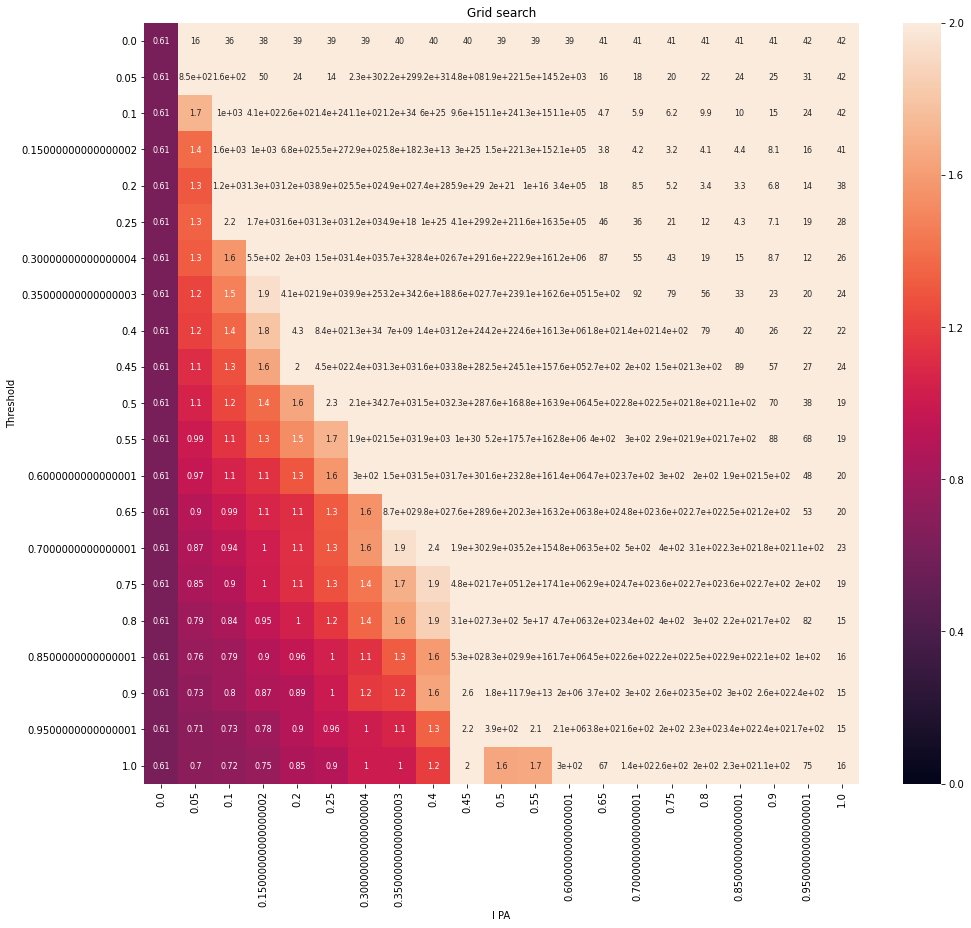

In [27]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [28]:
plt.savefig('../output/grid_search1_nomination.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 2. Grid search: subspace (2000 parameter combinations)

In [29]:
# specify parameter space for grid search
t_seq = np.arange(0.025,1.025,0.025)
i_seq = np.arange(0.001,0.051,0.001)

## 2.1 Run grid search simulations

In [30]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute(t_range=t_seq,
                                                                           i_range=i_seq,
                                                                           t=700,
                                                                           population_name='nomination')

thres_PA: 0.025 I_PA: 0.001 error: 0.5753096239666842 runtime: 10.011173248291016
thres_PA: 0.025 I_PA: 0.002 error: 0.5141974401215408 runtime: 8.762961864471436
thres_PA: 0.025 I_PA: 0.003 error: 0.47331434626067204 runtime: 8.774477005004883
thres_PA: 0.025 I_PA: 0.004 error: 0.4710203318580881 runtime: 8.812878131866455
thres_PA: 0.025 I_PA: 0.005 error: 0.47104518216647484 runtime: 8.69825792312622
thres_PA: 0.025 I_PA: 0.006 error: 0.47168792197077375 runtime: 8.842031955718994
thres_PA: 0.025 I_PA: 0.007 error: 0.46207148667184256 runtime: 8.698269128799438
thres_PA: 0.025 I_PA: 0.008 error: 0.4743098430159694 runtime: 9.018975973129272
thres_PA: 0.025 I_PA: 0.009000000000000001 error: 0.47221143883506156 runtime: 8.965017795562744
thres_PA: 0.025 I_PA: 0.010000000000000002 error: 0.49320465322555174 runtime: 8.79778504371643
thres_PA: 0.025 I_PA: 0.011 error: 0.5051418406338112 runtime: 8.925522089004517
thres_PA: 0.025 I_PA: 0.012 error: 0.4848659492183526 runtime: 8.896821975

### 2.2 Results

In [31]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049,0.050
0,,,,,,,,,,,,,,,,,,,,,
0.025,0.575310,0.514197,0.473314,0.471020,0.471045,0.471688,0.462071,0.474310,0.472211,0.493205,...,257.474389,259.144729,253.605238,217.067162,199.421778,213.628821,179.029275,163.035919,130.273926,134.381441
0.050,0.575283,0.706051,0.675855,0.674895,0.680375,0.681715,0.685258,0.693669,0.691772,0.704621,...,1115.514269,1110.746851,1023.684730,1006.500864,991.342048,866.148355,892.971770,776.556877,764.512390,846.346121
0.075,0.605631,0.817588,0.795678,0.800399,0.807723,0.805553,0.821957,0.821502,0.823349,0.843672,...,555.874529,1437.361019,888.954865,852.714121,916.760705,288.033881,1471.113778,1016.028139,1029.280897,1191.243792
0.100,0.650224,0.913320,0.909382,0.911817,0.920795,0.921815,0.933194,0.932099,0.942208,0.945663,...,1.353525,1.353084,1.421302,1.331589,1.422091,1.273079,1.477886,1.477437,557.167177,1.715520
0.125,0.678698,0.952502,0.955855,0.960242,0.968082,0.972173,0.980558,0.971186,0.985016,0.990557,...,1.262099,1.240575,1.293467,1.281405,1.341398,1.355088,1.387068,1.499506,1.510776,1.602775
0.150,0.724886,0.995220,0.994245,0.995898,1.001866,1.000160,1.004304,1.008852,1.016774,1.015763,...,1.238478,1.260323,1.274192,1.322731,1.252003,1.268753,1.415539,1.485165,1.292882,1.379107
0.175,0.779719,1.063078,1.058929,1.063104,1.065532,1.071610,1.071616,1.072215,1.072357,1.076031,...,1.209161,1.253046,1.246562,1.258636,1.289852,1.252591,1.293386,1.248396,1.308316,1.323317
0.200,0.821526,1.104505,1.104481,1.108828,1.109798,1.112235,1.116851,1.118683,1.130359,1.119986,...,1.274481,1.265872,1.273655,1.316193,1.312518,1.304463,1.328922,1.337206,1.334201,1.298573
0.225,0.851573,1.129921,1.130465,1.130364,1.133226,1.138834,1.143826,1.144244,1.148673,1.150133,...,1.261915,1.279776,1.315289,1.281045,1.300914,1.331596,1.338083,1.320657,1.300054,1.323647


Text(0.5, 105.0, 'I PA')

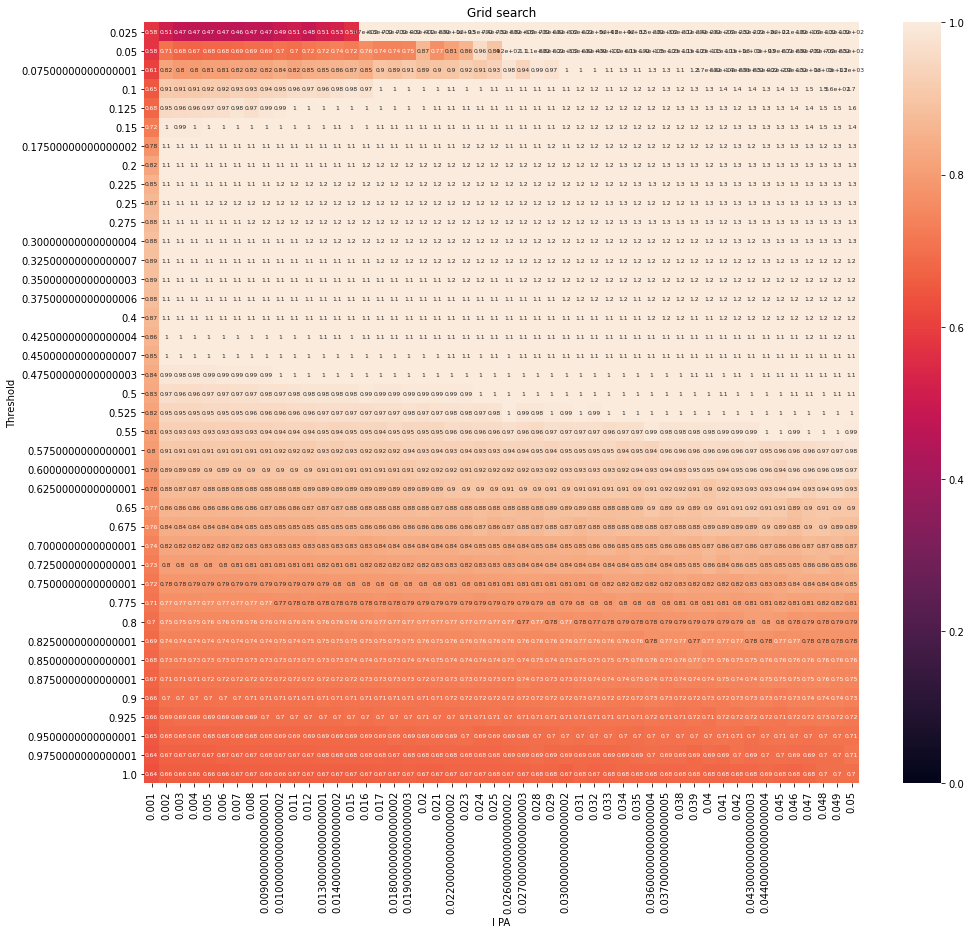

In [37]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1)
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [38]:
plt.savefig('../output/grid_search2_nomination.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

0      1.390215
1      1.387053
2      1.383996
3      1.381223
4      1.378603
         ...   
695    1.439052
696    1.439052
697    1.439052
698    1.439052
699    1.439052
Length: 700, dtype: float64

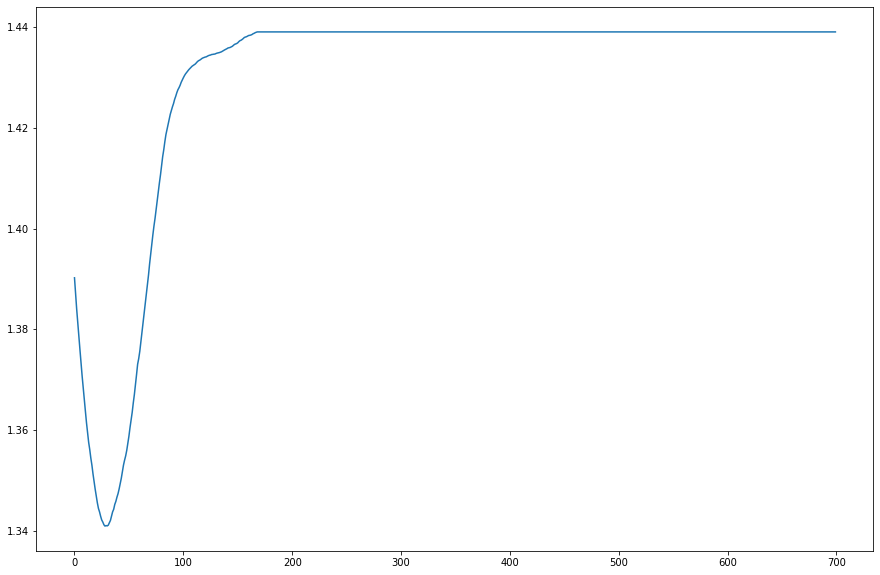

In [39]:
# Plot single parameter combination (for visualization)
a = pd.DataFrame(result_cl2[11]).mean(axis=1)
a.plot(figsize=((15,10)))
a

### 2.3 Select best fitting parameter combinations

In [40]:
sort_errors = result_error2

opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(0.025, 0.007, 0.46207148667184256),
 (0.025, 0.004, 0.4710203318580881),
 (0.025, 0.005, 0.47104518216647484),
 (0.025, 0.006, 0.47168792197077375),
 (0.025, 0.009000000000000001, 0.47221143883506156),
 (0.025, 0.003, 0.47331434626067204),
 (0.025, 0.008, 0.4743098430159694),
 (0.025, 0.012, 0.4848659492183526),
 (0.025, 0.010000000000000002, 0.49320465322555174),
 (0.025, 0.011, 0.5051418406338112),
 (0.025, 0.002, 0.5141974401215408),
 (0.025, 0.013000000000000001, 0.5145530156848344),
 (0.025, 0.014000000000000002, 0.5271254967053765),
 (0.025, 0.015, 0.5611410768509864),
 (0.05, 0.001, 0.5752831608011225),
 (0.025, 0.001, 0.5753096239666842),
 (0.07500000000000001, 0.001, 0.60563078224725),
 (1.0, 0.001, 0.6354265491315771),
 (0.9750000000000001, 0.001, 0.642193218993476),
 (0.9500000000000001, 0.001, 0.6492241040321786),
 (0.1, 0.001, 0.650223930466809),
 (0.925, 0.001, 0.6571107963650065),
 (1.0, 0.002, 0.6613614545513034),
 (1.0, 0.005, 0.662377817016316),
 (1.0, 0.003, 0.6624

In [41]:
with open('../output/opt_pars_nomination.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)